<a href="https://colab.research.google.com/github/Sheha1218/Brain_Tumor_Detections_System/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=od.download('https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset')

Skipping, found downloaded files in "./brain-tumor-mri-dataset" (use force=True to force download)


In [ ]:
data_dir=('/content/brain-tumor-mri-dataset/Training')
test_dir=('/content/brain-tumor-mri-dataset/Testing')

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [ ]:
len(data_dir)

41

In [ ]:
data=tf.keras.utils.image_dataset_from_directory(data_dir,
                                                     image_size=IMAGE_SIZE,
                                                     batch_size=BATCH_SIZE,
                                                     subset='training',
                                                     validation_split=0.15,
                                                     seed=42
                                                     )

validation=tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       image_size=IMAGE_SIZE,
                                                       batch_size=BATCH_SIZE,
                                                       subset='validation',
                                                       validation_split=0.15,
                                                       seed=42)

Found 5712 files belonging to 4 classes.
Using 4856 files for training.
Found 5712 files belonging to 4 classes.
Using 856 files for validation.


In [ ]:
data.class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

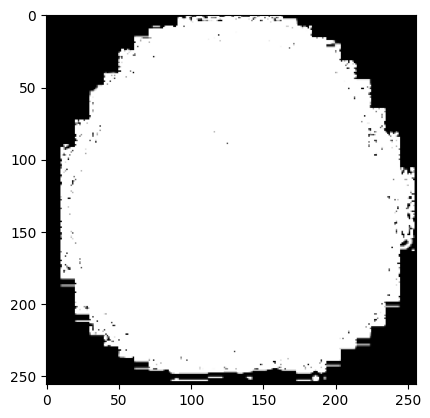

In [ ]:
for image_batch,label_batch in data.take(1):
  plt.imshow(image_batch[0].numpy())

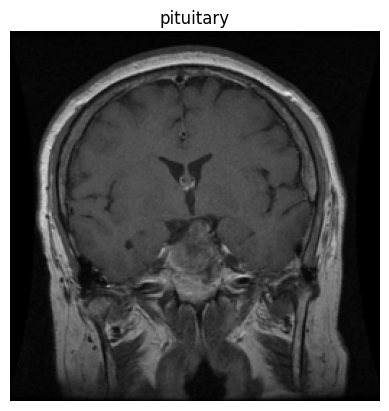

In [ ]:
for image_batch,label_batch in data.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.title(data.class_names[label_batch[0]])
  plt.axis("off")

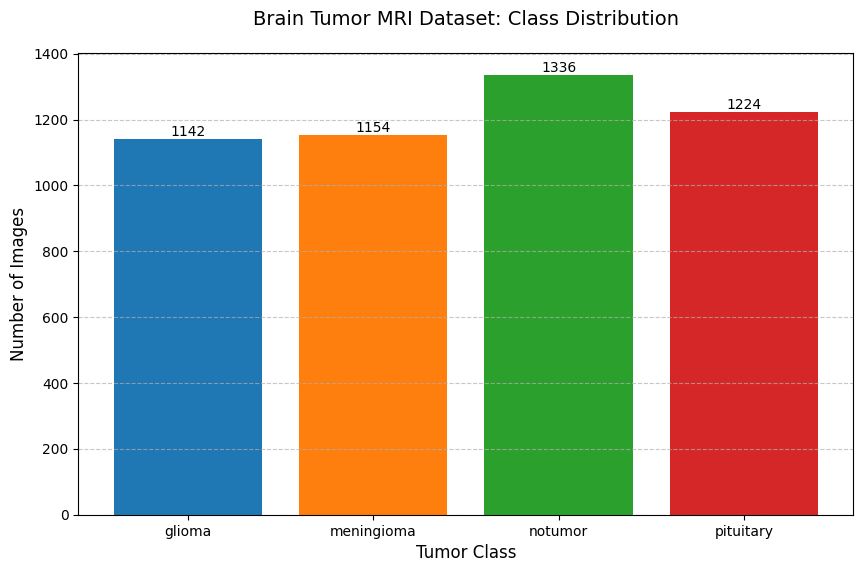

In [ ]:
classes = data.class_names

counts = []
for class_name in classes:
  count = 0
  for _, label_batch in data.as_numpy_iterator():

    count += np.sum(label_batch == data.class_names.index(class_name))
  counts.append(count)

plt.figure(figsize=(10, 6))
bars = plt.bar(classes, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.xlabel('Tumor Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Brain Tumor MRI Dataset: Class Distribution', fontsize=14, pad=20)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
data=data.map(lambda x,y:(x/255,y))
validation=validation.map(lambda x,y:(x/255,y))

In [ ]:
data=data.map(lambda x,y:(x,tf.one_hot(y,depth=4)))
validation=validation.map(lambda x,y:(x,tf.one_hot(y,depth=4)))

In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.3)
])

In [ ]:
model=tf.keras.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(4,activation='softmax'))




In [ ]:
model.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(data,epochs=15,validation_data=validation)

Epoch 1/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.8771 - loss: 0.3353 - val_accuracy: 0.8703 - val_loss: 0.3799
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.8872 - loss: 0.2988 - val_accuracy: 0.8505 - val_loss: 0.4268
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8860 - loss: 0.3020 - val_accuracy: 0.9089 - val_loss: 0.2954
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.8935 - loss: 0.2700 - val_accuracy: 0.8119 - val_loss: 0.5928
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.8658 - loss: 0.3587 - val_accuracy: 0.9112 - val_loss: 0.2243
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.8988 - loss: 0.2772 - val_accuracy: 0.8902 - val_loss: 0.3025
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.8946 - loss: 0.2583 - val_accuracy: 0.8984 - val_loss: 0.3028
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.9099 - loss: 0.2286 - 

In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False )

Found 1311 files belonging to 4 classes.


In [ ]:
test_data=test_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x,tf.one_hot(y,depth=4)))

In [ ]:
score=model.evaluate(test_data)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8332 - loss: 0.4804


In [ ]:
len(history.history)

4

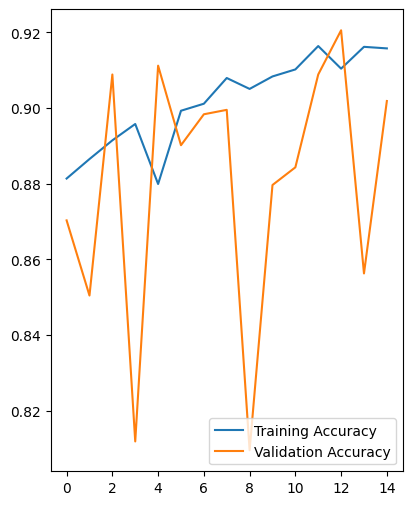

In [ ]:
EPOCHS = 15
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

prediction
Prdiction class glioma


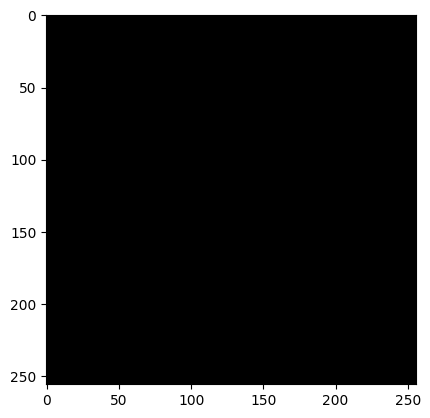

In [ ]:
for image_batch,label_batch in test_data.take(1):
  first_image=image_batch[0].numpy().astype('uint8')
  first_label=label_batch[0].numpy()

  print('prediction')
  plt.imshow(first_image)
  print('Prdiction class',classes[np.argmax(first_label)])

In [ ]:
model.save('model.h5')